In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

We read the images channel-wise into different matrices

In [2]:
img_i = imread('iband.gif')
img_b = imread('bband.gif')
img_g = imread('gband.gif')
img_r = imread('rband.gif')

Verifying the sizes of the images

In [3]:
print("img_i : " + str(len(img_i)) + "," + str(len(img_i[0])))
print("img_b : " + str(len(img_b)) + "," + str(len(img_b[0])))
print("img_g : " + str(len(img_g)) + "," + str(len(img_g[0])))
print("img_r : " + str(len(img_r)) + "," + str(len(img_r[0])))

img_i : 512,512
img_b : 512,512
img_g : 512,512
img_r : 512,512


From the output data, we try to calculate the number of points lying on the river and number of points lying on non_river regions. From the output image, we can see that the points on the river have high rgb value, i.e > 255 * 0.5. We make those points as "1" and elsewhere 0 

In [4]:
img_y = plt.imread('op1.jpeg')
img_y = (img_y > (0.5*255)) * 1
river_points_population = np.sum(img_y==1)

In [5]:
print("No. of points on the river is: " + str(river_points_population))

No. of points on the river is: 9449


Now that we have obtained the data, we now take 50 random points from the non-river class and 100 random points from the river class

In [6]:
img_y = img_y.flatten()
#Covering the river portion
cover_river = np.floor(np.random.rand(50) * river_points_population)    #Selecting in random distribution
# print(cover_river)
class_riv = []
j = 0
for i in range(512*512):
    if(img_y[i]==1):
        j+=1
        if j in cover_river:
            class_riv.append(i)
print(class_riv)    

[12963, 27309, 39086, 39593, 50859, 70813, 72866, 75951, 76976, 77474, 79527, 83108, 85156, 86187, 89771, 95904, 97955, 105646, 107684, 109735, 110763, 114862, 114872, 115899, 123073, 127683, 130232, 134855, 135365, 141523, 147161, 150747, 158929, 163552, 166101, 166596, 182465, 189632, 203960, 212661, 217270, 238256, 238754, 241312, 244383, 254109, 255128, 255631, 257168]


In [7]:
non_river_points_population = np.sum(img_y==0)
print("No.  of points on non river portion is: " + str(non_river_points_population))

No.  of points on non river portion is: 252695


In [8]:
cover_non_river = np.floor(np.random.rand(100) * non_river_points_population)    #Selecting in rnon_river_points_poandom distribution
# print(cover_non_river)
class_non_riv = []
j=0
for i in range(512*512):
    if(img_y[i] == 0):
        j+=1
        if j in cover_non_river:
            class_non_riv.append(i)
print(class_non_riv)            

[1472, 5763, 6080, 7624, 10881, 17952, 21767, 22706, 32147, 33249, 33707, 38852, 40453, 43834, 44505, 45021, 51528, 51806, 52150, 56118, 60373, 61769, 62692, 64715, 66928, 67100, 71090, 72893, 73020, 75284, 75501, 75978, 79823, 79844, 81956, 86226, 86337, 86515, 86893, 93045, 93908, 96125, 96136, 96149, 96625, 97267, 97562, 99766, 101628, 107191, 110648, 112598, 120120, 120943, 120990, 126880, 133285, 133437, 133442, 135526, 136441, 140096, 145395, 146763, 150568, 152055, 158077, 165333, 165529, 166387, 166990, 172914, 173049, 174060, 192601, 200957, 205099, 205350, 206443, 208364, 208404, 208984, 210496, 211834, 212539, 213158, 215470, 226685, 227579, 229982, 231031, 232003, 234951, 237341, 240357, 247378, 247770, 251704, 252327, 254008]


Now, we calculate the mean for each of our 4 classes: first of all, we stack each individual image vector to prepare the test set

(512, 512, 4)
[44.02040816 30.06122449 31.34693878 21.79591837] [40.62 25.78 26.4  34.82]


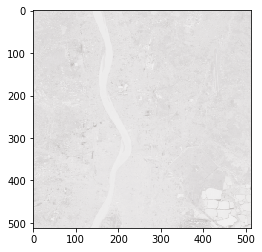

In [9]:
test_data = np.dstack((img_r, img_g, img_b, img_i))
test_cpy = test_data
print(test_data.shape)
plt.imshow(test_data)
test_data = test_data.reshape(-1, 4)
river_mean = np.mean(test_data[class_riv], axis=0)
non_river_mean = np.mean(test_data[class_non_riv], axis=0)
print(river_mean, non_river_mean)

Now for the calcuation of probability distribution, we need to find the 4x4 covariance matrix from the test data recently constructed by us. 

In [10]:
test_data = test_data.reshape(-1,4)
covariance_riv = np.cov(test_data[class_riv].T)
covariance_non_riv = np.cov(test_data[class_non_riv].T)
print(covariance_riv)
print(covariance_non_riv)
print(covariance_riv.shape, covariance_non_riv.shape)

[[1.06207483 0.35289116 0.26360544 1.15008503]
 [0.35289116 0.47534014 0.29081633 0.28358844]
 [0.26360544 0.29081633 0.56462585 0.19727891]
 [1.15008503 0.28358844 0.19727891 3.74914966]]
[[ 7.57131313  6.12767677  7.81010101  3.18343434]
 [ 6.12767677  5.74909091  7.03838384  3.71757576]
 [ 7.81010101  7.03838384 11.29292929  4.08282828]
 [ 3.18343434  3.71757576  4.08282828 29.40161616]]
(4, 4) (4, 4)


We now calculate the River class by 
River_class = (Test_data – T1) T * Inverse (Covariance_matrix_Riverclass) *(Test_data – T1)

In [11]:
riv_1 = np.zeros(512*512)
for i in range(512*512):
    riv_1[i] = (test_data[i] - river_mean).T@np.linalg.inv(covariance_riv)@(test_data[i] - river_mean)

In [12]:
len(riv_1)

262144

We now calculate the non-river class by 
Nonriver class = (Test_data – T2) T * Inverse (Covariance_matrix_NonRiverclass) *(Test_data –
T2)

In [13]:
non_riv_1 = np.zeros(512*512)
for i in range(512*512):
    non_riv_1[i] = (test_data[i] - non_river_mean).T@np.linalg.inv(covariance_non_riv)@(test_data[i] - non_river_mean)

In [14]:
len(non_riv_1)

262144

We now calculate the required probabilities for both river and non river classes over each pixel

In [15]:
# Probability multivariate definition of river class
p1 = ((1/np.sqrt(2*3.14159))**(50))*(1/np.sqrt(np.linalg.det(covariance_riv)))*np.exp((-1/2)*riv_1)
print(p1)
p1.shape

[1.85321413e-76 5.47226479e-67 2.12475446e-85 ... 2.27245878e-78
 8.27672394e-96 4.05320881e-76]


(262144,)

In [16]:
# Probability multivariate definition of non-river class
p2 = ((1/np.sqrt(2*3.14159))**100)*(1/np.sqrt(np.linalg.det(covariance_non_riv)))*np.exp((-1/2)*non_riv_1)
print(p2)
p2.shape

[1.19750369e-42 1.58875919e-42 6.81431130e-43 ... 1.19898462e-43
 1.04836575e-43 1.11331535e-43]


(262144,)

# GENERATING RESULTS AS ASKED:

We now generate the results according to the apriori probabilities of the river and non-river class
#### P1 = 0.3 , P2 = 0.7

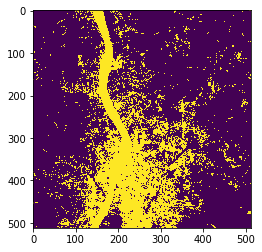

In [17]:
op = []
P1 = 0.3
P2 = 0.7
op = (P1*p1>=P2*p2)*255
op = op.reshape(512,512)
plt.imshow(op)

#### P1 = P2 = 0.5

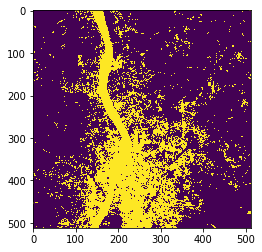

In [18]:
op = []
P1 = 0.5
P2 = 0.5
op = (P1*p1>=P2*p2)*255
op = op.reshape(512,512)
plt.imshow(op)

#### P1 = 0.7, P2 = 0.3 

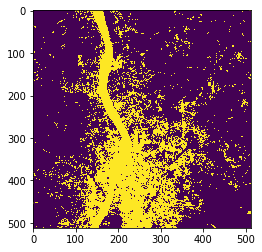

In [19]:
op = []
P1 = 0.5
P2 = 0.5
op = (P1*p1>=P2*p2)*255
op = op.reshape(512,512)
plt.imshow(op)

### SUMMARY
Thus, we create our distinction of river vs non-river points, using 50 points to train the river class and 100 points to train the non-river class. This prediction had moderate accuracy, and to find the apriori probabilities, we use the multivariate normal distribution. 

##### Name : Shantam Shrestha
#### Roll number : IEC2017052
#### Course : ISCO630E, Jan-May, 2020

###### Special thanks to @cromagnonninja for the inspiration